# Data Analytics: Understanding Customers
**Author: Magdalena Kobusińska  
Time: July 2021  
What for: Project done for the Ubiqum Academy scholarship**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The data file contains a dataset with customer transactions, it includes some information about the customer who made the transaction, as well as the amount of the transaction, and how many items were purchased.

In-store Column Mapping:  
- 1: in-store purchases  
- 0: online purchases

Region Column Mapping:  
- 1: North  
- 2: South  
- 3: East  
- 4: West

In [2]:
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


## Data cleaning 

In [3]:
duplicated = data[data.duplicated()]
duplicated

,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


Besides the fact we have not enough data specification to decide if the same data are the duplicates or just a strange coincidence where the people in the same region, of the same age buys the same amount of items of the same value, I decided to delete them. Therefore, I optained 21 deleted records, what leaves me with 79979 data records.

In [4]:
data = data.drop_duplicates()
data = data.dropna()

In [5]:
region_name = {1:"North", 2:"South", 3:"East", 4:"West"}
data_region_names = data.replace({"region": region_name})
data_region_names.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,South
1,0,35,2,219.51,South
2,1,45,3,1525.70,West
3,1,46,3,715.25,East
4,1,33,4,1937.50,North


## Basic data description

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79979 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  79979 non-null  int64  
 1   age       79979 non-null  int64  
 2   items     79979 non-null  int64  
 3   amount    79979 non-null  float64
 4   region    79979 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.7 MB


In [7]:
table_statistics = data.describe()
table_statistics.round(3)

,in-store,age,items,amount,region
count,79979.0,79979.000,79979.000,79979.000,79979.000
mean,0.5,45.759,4.505,835.826,2.675
std,0.5,15.715,2.061,721.264,1.127
min,0.0,18.000,1.000,5.005,1.000
25%,0.0,33.000,3.000,285.120,2.000
50%,1.0,45.000,4.000,582.140,3.000
75%,1.0,56.000,6.000,1233.400,4.000
max,1.0,85.000,8.000,3000.000,4.000


First, I wanted to see the basic information about the data. Worth noting facts:
- mean age of the customer: 46
- number of transactions: 79979
- on average sold 4.5 items per transaction, number of items sold by one transaction: 1-8.
- minimum transaction was on \\$5 and maximum was on \\$3000
- most customers bought things for \\$582

# Task 1 - Investigating customer buying patterns
The task was to explore the customer transaction data from the Blackwell Electronics company from recent online and in-store sales, to get an insight about customer purchasing behavior. Questions that should be of particular interest:

- Do customers in different regions spend more per transaction? Which regions spend the most/least?  
- Is there a relationship between number of items purchased and amount spent?

## Amount of transactions in each region

In [8]:
data.groupby('region')['region'].count()

region
1    15997
2    19994
3    18000
4    25988
Name: region, dtype: int64

Text(0.5, 0.98, 'Number of transactions per region')

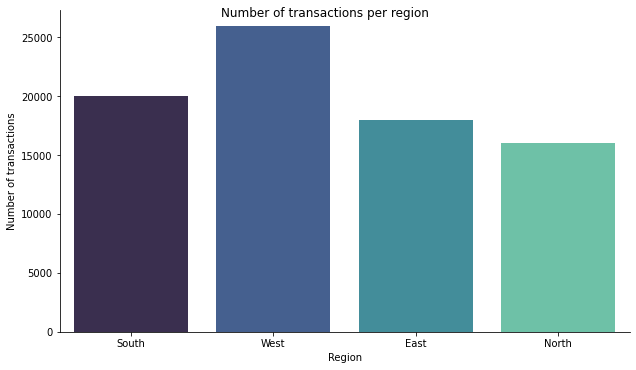

In [9]:
plt_1 = sns.catplot(x='region', data=data_region_names, kind='count', aspect=1.75, palette="mako")
plt_1.set_xlabels('Region')
plt_1.set_ylabels('Number of transactions')
plt_1.fig.suptitle('Number of transactions per region')

It can be seen that the most transactions was done in the West and the least - in the North.

Text(0.5, 0.98, 'Number of transactions with exact number of items per region')

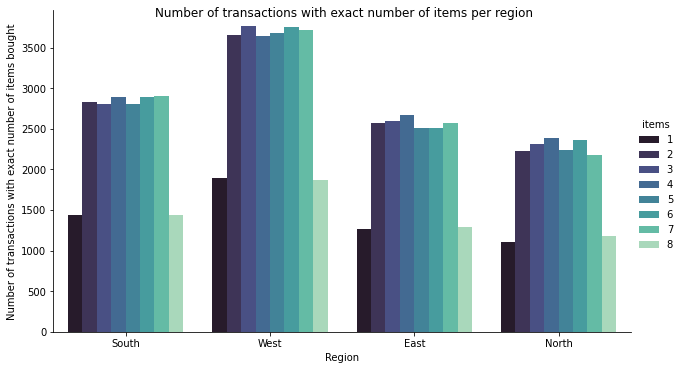

In [10]:
data.groupby(['region', 'items'])['region'].count()
plt_2 = sns.catplot(x='region', data=data_region_names, hue='items', kind='count', aspect=1.75, palette="mako")
plt_2.set_xlabels('Region')
plt_2.set_ylabels('Number of transactions with exact number of items bought')
plt_2.fig.suptitle('Number of transactions with exact number of items per region')

What's interesting, transactions where the customer bought just one or as many as 8 items were rare. It can be seen that on average the customers bought 4 items.

## Amount of money spent by region

In [11]:
pivot_sum_amount_per_region = data_region_names.pivot_table('amount','region', aggfunc=np.sum, margins=False)
pivot_sum_amount_per_region.style.format('${0:,.0f}')

,amount
region,
East,"$16,523,453"
North,"$11,917,620"
South,"$5,040,442"
West,"$33,366,990"


Text(0, 0.5, 'Total amount spent by customers')

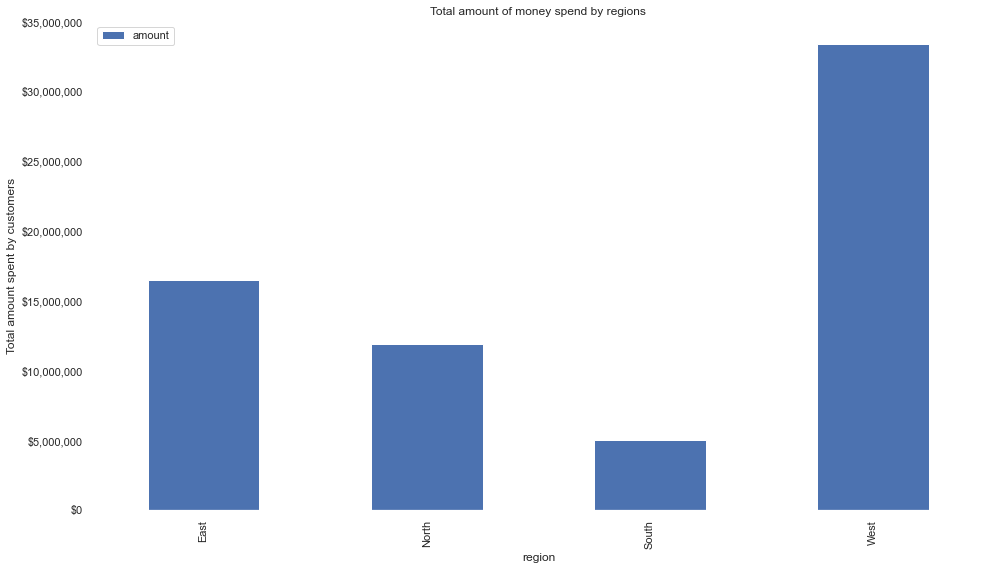

In [64]:
plt3 = pivot_sum_amount_per_region.plot.bar(figsize=(16, 9), title='Total amount of money spend by regions').yaxis.set_major_formatter('${x:,.0f}')
plt.ylabel('Total amount spent by customers')

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x="region", hue="age_sections", data=data_region_names, palette = 'mako')
plt.title("Age distribution with region division", fontsize=20)
plt.xlabel("Region")
plt.ylabel("Number of customers")
plt.legend(loc="upper right", title="Age sections")
plt.show()

The comparison between the graph with the number of transaction per region and the one that shows money spent by regions are not consistant. It can be seen that althought (as it could be predictable) on the West the customers both spent the most money and did the greatest amount of transactions, on the South, where the number of transaction was on the second place right after the West, the amount of money spent by customers was the lowest from all the regions. Therefore, to get the better view, I decided to do one more plot.

[Text(0, 0, 'North'),
 Text(1, 0, 'South'),
 Text(2, 0, 'East'),
 Text(3, 0, 'West')]

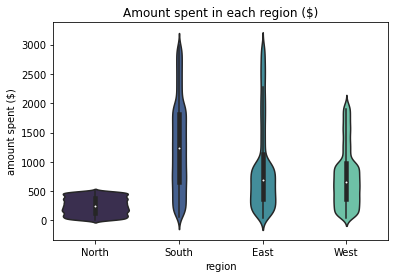

In [13]:
plt_4 = sns.violinplot(x="region", y="amount", data=data_region_names, palette="mako")
plt_4.set(title='Amount spent in each region ($)', xlabel='region', ylabel='amount spent ($)')
plt_4.set_xticklabels(["North", "South", "East", "West"])

By viewing the plot above, it can be seen that in the West, the transactions were the most evenly distributed in terms of the amount of money spent. In the North and in the East the lower value transactions have prevailed, but there have also been some where a larger amount has been spent. In the South lower value transactions have dominated.

In [14]:
# Mean amount spent for exact number of items in certain region
pivot_mean_amount_items_number = data_region_names.pivot_table('amount', 'region', 'items', aggfunc=np.mean, margins=False, margins_name = 'All')
pivot_mean_amount_items_number

items,1,2,3,4,5,6,7,8
region,,,,,,,,
East,894.239667,931.767999,916.421853,935.009959,911.578511,903.035816,910.417209,937.914856
North,751.450329,766.924871,743.810869,727.300536,745.737906,740.033224,737.791975,757.540969
South,257.587746,250.012124,252.182018,249.626762,252.399170,254.961019,251.735042,249.882689
West,1255.778428,1297.199268,1272.761661,1280.247027,1277.747343,1296.386021,1280.238420,1310.646915


Text(0, 0.5, 'Amount spent')

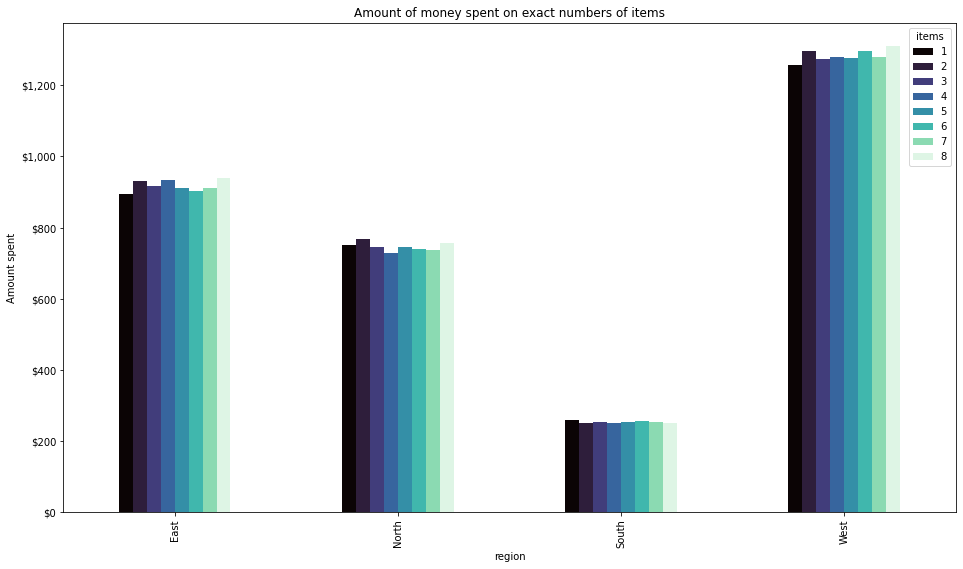

In [15]:
plt_5 = pivot_mean_amount_items_number.plot(kind="bar",figsize=(16, 9), title='Amount of money spent on exact numbers of items', cmap="mako").yaxis.set_major_formatter('${x:,.0f}')
plt.ylabel('Amount spent')

What may be considered as something unexpected - the number of items bought did not have any connection with the amount of money spend by the customer.
The most money was spent in the West, ahe least - in the South.

## In-store/online by regions

In [16]:
pivot_money = pd.pivot_table(data_region_names,index='region',columns='in-store', values='amount',aggfunc='sum', margins = True)
pivot_money.style.format('${0:,.0f}')

in-store,0,1,All
region,,,
East,"$10,793,540","$5,729,913","$16,523,453"
North,$nan,"$11,917,620","$11,917,620"
South,"$5,040,442",$nan,"$5,040,442"
West,"$20,058,007","$13,308,983","$33,366,990"
All,"$35,891,990","$30,956,516","$66,848,506"


[Text(0.5, 1.0, 'Amount of items bought in each region in-store/online'),
 Text(0.5, 0, 'region'),
 Text(0, 0.5, 'Amount of items')]

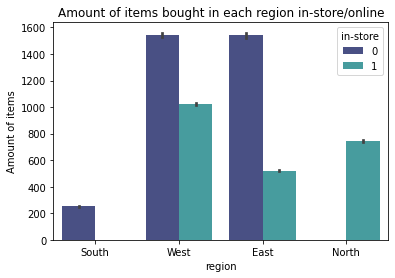

In [17]:
plt_6 = sns.barplot(x="region", y="amount", hue="in-store", data=data_region_names, palette="mako")
plt_6.set(title='Amount of items bought in each region in-store/online', xlabel='region', ylabel='Amount of items')

In the North, there was none transactions done online, which may indicate that the stores there are very well equipped and with nice service - the customers prefere to go and see the desired items and ask about the specifation before buying them. On the contrary, in the South, there was no transactions done in-store, what indicated that the region has none or vary few retail shops in the area. Both in the East and in the West online transactions were the dominant ones.

## Age vs region

c:\users\magda\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


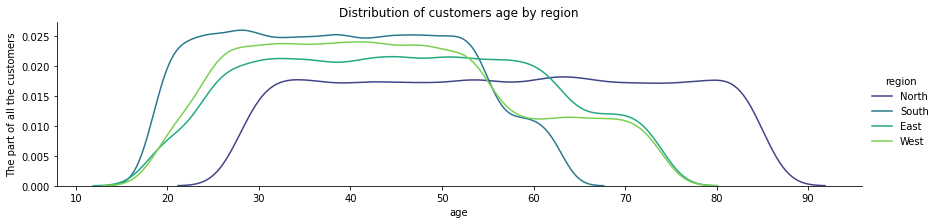

In [18]:
plt_7 = sns.FacetGrid(data_region_names, hue='region', aspect=4, palette="viridis")
plt_7.map(sns.kdeplot, 'age')
oldest = data['age'].max()
plt_7.set(title='Distribution of customers age by region', ylabel = 'The part of all the customers')
plt_7.add_legend(labels=["North", "South", "East", "West"])

It can be seen that most elder people bought any items in the South, the youngest people were usually from the West.

## Age vs. in-store

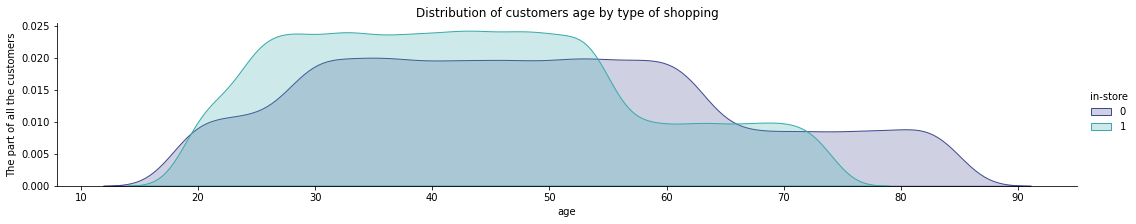

In [19]:
plt_8 = sns.FacetGrid(data_region_names, hue='in-store', aspect=5, palette="mako")
plt_8.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
plt_8.set(title='Distribution of customers age by type of shopping', ylabel = 'The part of all the customers')
plt_8.add_legend()

It can be seen that the younger people decided to make more transactions in-store, whereas the elder ones prefered online option. It may be connected with the the possible lack of the on-site shops in the South, as what's where the most elder customers come from.

In [20]:
data_region_names['age_sections'] = pd.cut(data_region_names['age'], bins=[0,21,35,55,75,100], labels=['under 21','age 21-35','age 36-55','age 56-75','over 75'])
data_region_names.head()

,in-store,age,items,amount,region,age_sections
0,0,37,4,281.03,South,age 36-55
1,0,35,2,219.51,South,age 21-35
2,1,45,3,1525.70,West,age 36-55
3,1,46,3,715.25,East,age 36-55
4,1,33,4,1937.50,North,age 21-35


## Amount of money spent by the age groups

In [21]:
pivot_age_groups = pd.pivot_table(data_region_names,index='age_sections',columns='in-store',values='amount',aggfunc='sum',fill_value=0, margins=False)
pivot_age_groups.style.format('${0:,.0f}')

in-store,0,1
age_sections,,
under 21,"$2,364,162","$1,414,612"
age 21-35,"$10,374,726","$10,382,436"
age 36-55,"$15,379,563","$15,368,849"
age 56-75,"$6,911,880","$3,790,619"
over 75,"$861,658",$0


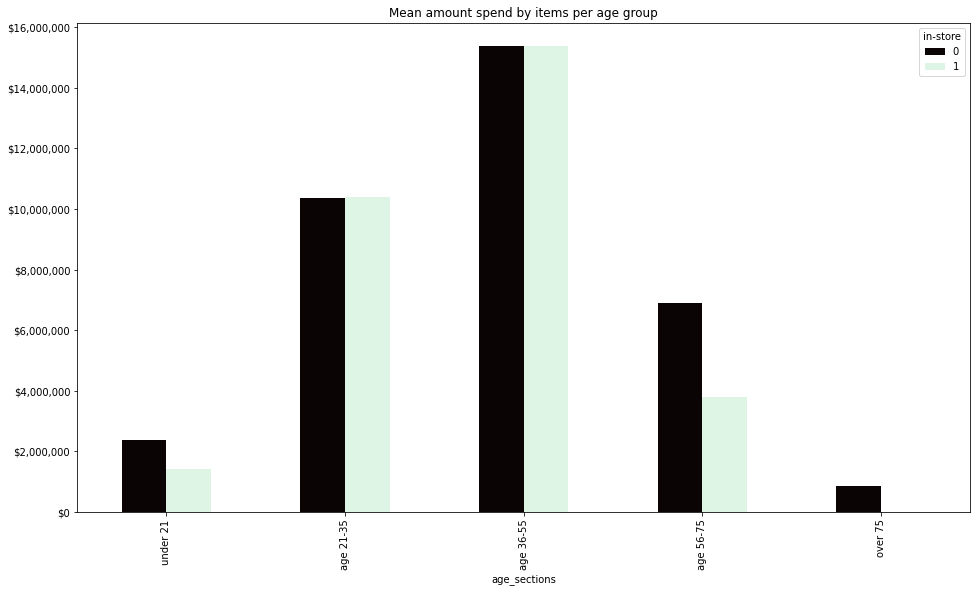

In [22]:
pivot_age_groups.plot.bar(figsize=(16, 9), title='Mean amount spend by items per age group', cmap="mako").yaxis.set_major_formatter('${x:,.0f}')

At the end, I decided to see the relation between the age of the customers and the amount of money spend. The most frequent customens were in the age range between 36-55 years old and they also spent the most.

## Conclusions

- The most transactions was done in the West and the least - in the North.
- On average the customers bought 4 items, transactions with 1 or 8 items were rare.
- The number of transaction per region and the one that shows money spent by regions are not consistant.
- **The most money was spent in the West, ahe least - in the South**
- **The transactions were the most evenly distributed in terms of the amount of money spent in the West. In the North and in the East the lower value transactions have prevailed, but there have also been some where a larger amount has been spent. In the South lower value transactions have dominated.**
- **The number of items bought did not have any connection with the amount of money spend by the customer.**
- In the North, there was none transactions done online. On the contrary, in the South, there was no transactions done in-store. Both in the East and in the West online transactions were the dominant ones.
- Most elder people bought any items in the South, the youngest people were usually from the West.
- Younger people decided to make more transactions in-store, whereas the elder ones prefered online option.
- The most frequent customens were in the age range between 36-55 years old and they also spent the most.

# Task 2 - Investigate Customer Demographics

Use data mining methods to explore the customer transaction data collected from recent online and in-store sales to infer any insights and conclusions about customer purchasing behavior, specifically:

- Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?
- Is there any correlation between age of a customer and if the transaction was made online or in the store? Or do other factors correlate to an online or in-store transaction?

Other questions:
- What about items? Are these even in the tree? Why or why not?
- What about classifying Where a transaction took place -can that be done successfully?

In [23]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier ,export_graphviz, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import tree

## Heatmap - variables relationship

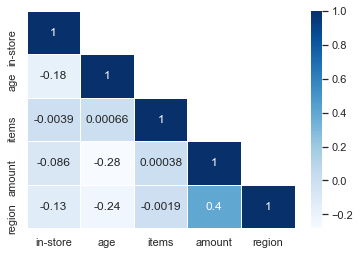

In [24]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

plt.figure()
mask = np.array(data.corr())
mask[np.tril_indices_from(mask)] = False
svm = sns.heatmap(data.corr(), annot=True,
            linewidth=.8, mask=mask, cmap=plt.cm.Blues);
figure = svm.get_figure()    
figure.savefig('heatmap.png', dpi=100)


It can be seen that the most significant correlation coefficient is between region and amount. Also, it seems that correlations between age and region as well as age and amount are playing the great role in prediction based on these data. Correlation with the variable of items amount are vary low, so we can assume there have very little or no impact for the predictions.

## Region as a target variable

### Region variable analysis and correlation

c:\users\magda\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\magda\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


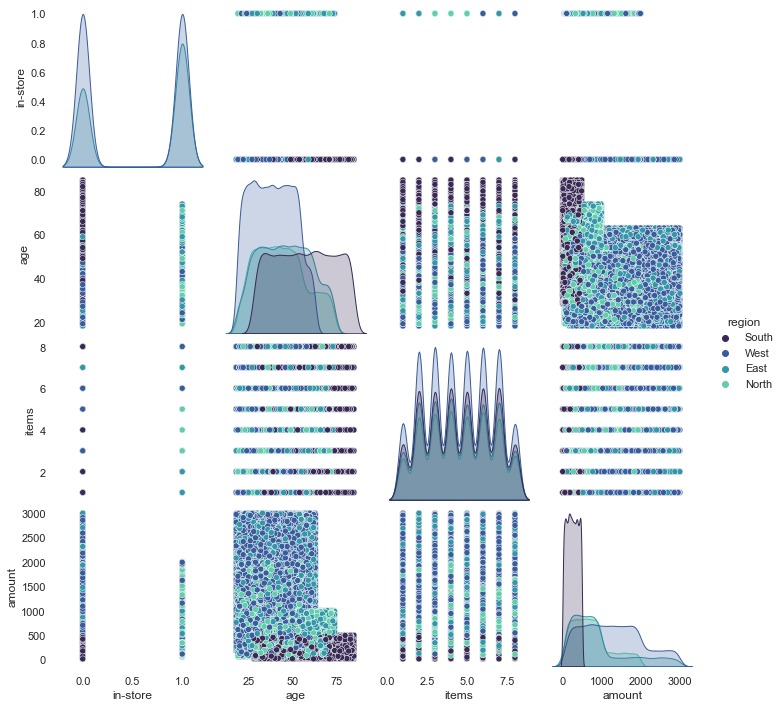

In [25]:
sns.pairplot(data_region_names, hue= 'region', palette='mako')

### Region prediction based on other parameters

#### Confusion matrix

In [26]:
X_region = data_region_names.drop(columns=['region', 'age_sections'])
y_region = data_region_names['region']
X_train, X_test, y_train, y_test = train_test_split(X_region, y_region, test_size = .30, random_state = 123)

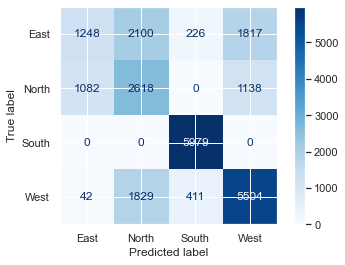

In [27]:
classifier_region = DecisionTreeClassifier(max_depth = 4, random_state = 100)
classifier_region.fit(X_train, y_train)
y_pred = classifier_region.predict(X_test)
plot_confusion_matrix(classifier_region, X_test, y_test, cmap=plt.cm.Blues)

#### Classification report

In [28]:
print("Classification report:")
report = classification_report(y_test, y_pred, output_dict=True)
table = pd.DataFrame(report).transpose()
table.at['accuracy','precision']=None
table.at['accuracy','recall']=None
table.at['accuracy','support']=None
table = table.fillna('')
display(table)

Classification report:


,precision,recall,f1-score,support
East,0.526138,0.231497,0.321525,5391.0
North,0.399878,0.541133,0.459903,4838.0
South,0.903718,1.0,0.949424,5979.0
West,0.650668,0.70691,0.677624,7786.0
accuracy,,,0.639702,
macro avg,0.620101,0.619885,0.602119,23994.0
weighted avg,0.635178,0.639702,0.621445,23994.0


The accuracy of the prediction was approx. 64%, which means more than half of the instances were classified correctly (it's still not the high accuracy). The best prediction was made for South and West region, so it seems that are the regions which have some features in some way unique/different from others. East and North were not that good classified, so there's high probability their features are more similar to others. What's interesting, South was very rarely classified as the wrongly predicted label, so its' other features must be the most unique from the others.

#### Classification tree visualization

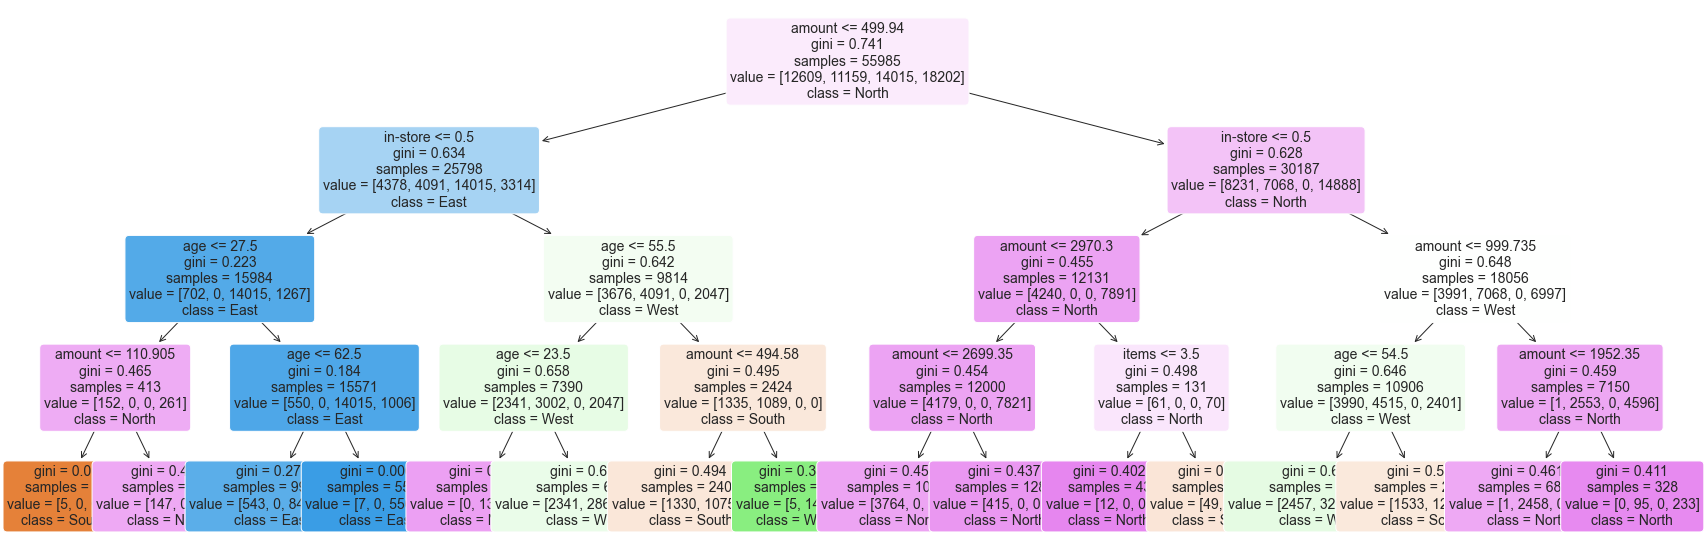

In [30]:
feature_names = X_region.columns
labels = y_region.unique()

plt.figure(figsize=(30,10))
a = tree.plot_tree(classifier_region,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [31]:
tree_rules = export_text(classifier_region, feature_names = list(feature_names))
print(tree_rules)

|--- amount <= 499.94
|   |--- in-store <= 0.50
|   |   |--- age <= 27.50
|   |   |   |--- amount <= 110.90
|   |   |   |   |--- class: East
|   |   |   |--- amount >  110.90
|   |   |   |   |--- class: West
|   |   |--- age >  27.50
|   |   |   |--- age <= 62.50
|   |   |   |   |--- class: South
|   |   |   |--- age >  62.50
|   |   |   |   |--- class: South
|   |--- in-store >  0.50
|   |   |--- age <= 55.50
|   |   |   |--- age <= 23.50
|   |   |   |   |--- class: West
|   |   |   |--- age >  23.50
|   |   |   |   |--- class: North
|   |   |--- age >  55.50
|   |   |   |--- amount <= 494.58
|   |   |   |   |--- class: East
|   |   |   |--- amount >  494.58
|   |   |   |   |--- class: North
|--- amount >  499.94
|   |--- in-store <= 0.50
|   |   |--- amount <= 2970.30
|   |   |   |--- amount <= 2699.35
|   |   |   |   |--- class: West
|   |   |   |--- amount >  2699.35
|   |   |   |   |--- class: West
|   |   |--- amount >  2970.30
|   |   |   |--- items <= 3.50
|   |   |   |   |--- 

The classification tree has shown that the most important feature in predicting the region based on the other factors in the database is the amount of money spent for the transaction as well as the age of the buyer and where the transaction was made (in-store/online).

#### Cross validation method

In [34]:
algorithms = []
algorithms.append(('Random Forest Classifier', RandomForestClassifier(max_depth=4)))
algorithms.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth=4)))
algorithms.append(('Gradient Boosting Classifier', GradientBoostingClassifier(n_estimators=100, max_depth=4)))

results = []
names = []
for name, algo in algorithms:
    result = cross_val_score(algo, X_region, y_region, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)

In [35]:
for i in range(len(names)):
    print(names[i], ":", results[i].mean())

Random Forest Classifier : 0.6424311407642469
Decision Tree Classifier : 0.642031055591344
Gradient Boosting Classifier : 0.642893770488574


The cross validation method has around 0.005 better accuracy than Decision Tree train-test method. It's not very impressive improvement, in fact it's almost the same looking at the number of instances in the database.

## Age of customers as a target variable
Are there differences in the age of customers between regions? If so, can we predict the age of a customer in a region based on other demographic data?

### Age variable discretization and analysis

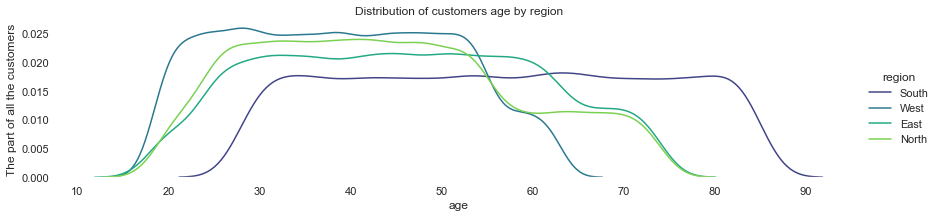

In [36]:
plt_age_region = sns.FacetGrid(data_region_names, hue='region', aspect=4, palette="viridis")
plt_age_region.map(sns.kdeplot, 'age')
oldest = data['age'].max()
plt_age_region.set(title='Distribution of customers age by region', ylabel = 'The part of all the customers')
plt_age_region.add_legend()

In [37]:
data['age_sections'] = pd.cut(data['age'], bins=[0,21,35,55,75,100], labels=['age 0-21','age 21-35','age 36-55','age 56-75','age 75+'])
data_region_names['age_sections'] = pd.cut(data_region_names['age'], bins=[0,21,35,55,75,100], labels=['age 0-21','age 21-35','age 36-55','age 56-75','age 75+'])
data_region_names.head()

,in-store,age,items,amount,region,age_sections
0,0,37,4,281.03,South,age 36-55
1,0,35,2,219.51,South,age 21-35
2,1,45,3,1525.70,West,age 36-55
3,1,46,3,715.25,East,age 36-55
4,1,33,4,1937.50,North,age 21-35


In [38]:
data_region_names['age_sections'].value_counts(sort=False)

age 0-21      2912
age 21-35    21265
age 36-55    34782
age 56-75    17603
age 75+       3417
Name: age_sections, dtype: int64

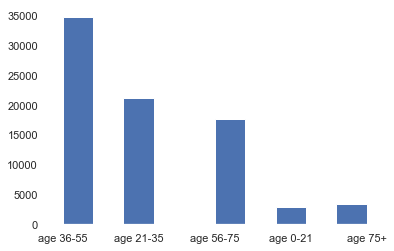

In [69]:
plt.hist(data_region_names['age_sections'], histtype ='bar', label = 'age_sections')
plt.show()

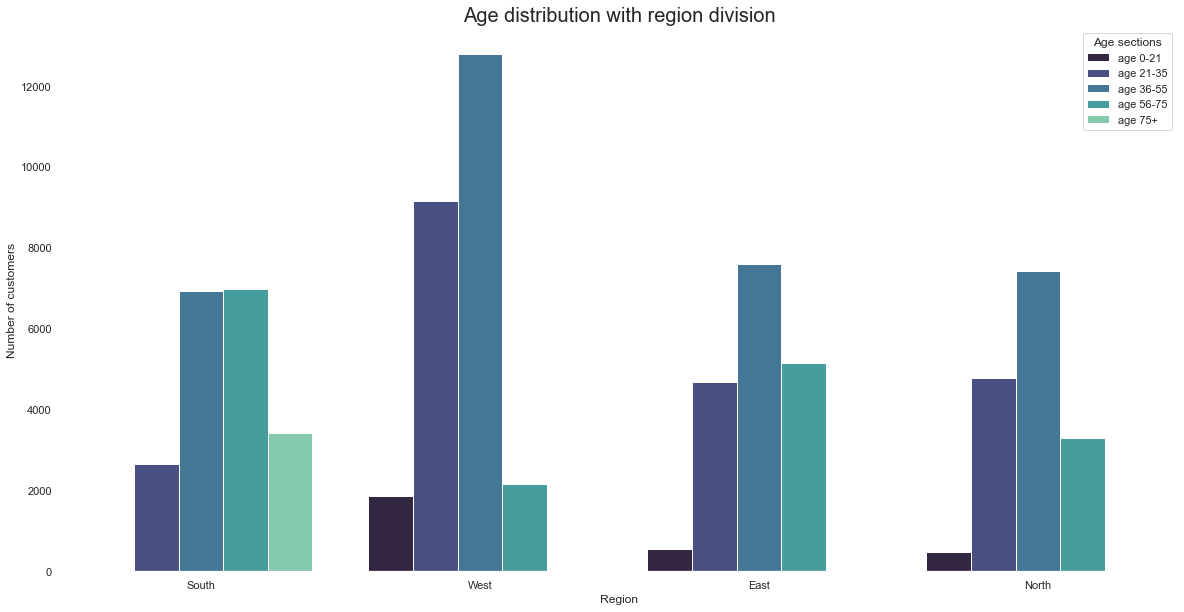

In [40]:
plt.figure(figsize=(20, 10))
sns.countplot(x="region", hue="age_sections", data=data_region_names, palette = 'mako')
plt.title("Age distribution with region division", fontsize=20)
plt.xlabel("Region")
plt.ylabel("Number of customers")
plt.legend(loc="upper right", title="Age sections")
plt.show()

Analysing the data, it can be seen that the largest number of customers is in the 36-55 age range and the least in the 6-21 range.
It is noteworthy that buyers over 75 are only found in the South, for this is also the only region with no people aged 6-21. Also, only the South region does not have the most customers from the age range 35-55, but slightly more buyers from 56-75 people. At a glance, it seems that in the South the general population is slightly older than in other regions. On the other hand, the youngest population appears to be the western region, where the ratio of young people to elder people is high.

### Age prediction

#### Confusion matrices for different classifiers

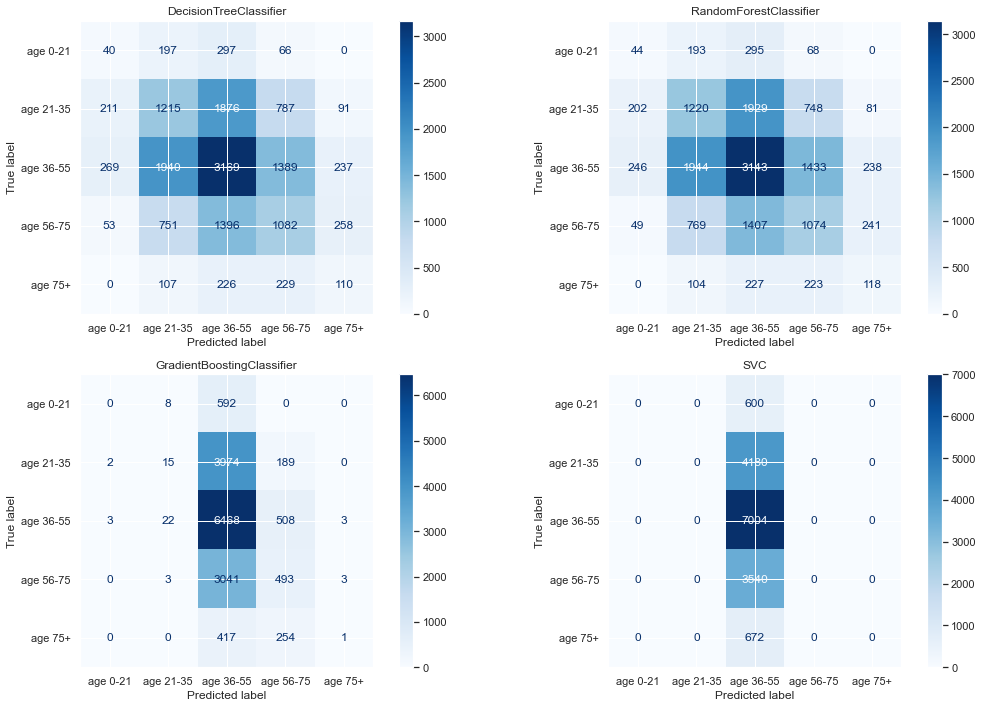

In [41]:
X_age = data.drop(columns=["age_sections", "age"])
y_age = data['age_sections']

X_train, X_test, y_train, y_test = train_test_split(X_age, y_age, test_size = .20, random_state = 123)
classifiers = [DecisionTreeClassifier(), 
               RandomForestClassifier(),
               GradientBoostingClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    print(plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues'))
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

#### Classification report (different classifiers)

In [70]:
for cls in (classifiers):
    y_pred = cls.predict(X_test)
    print("Classifier: ", cls)
    print(classification_report(y_test, y_pred, zero_division=0))

Classifier:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7924
           1       0.85      0.84      0.84      8072

    accuracy                           0.84     15996
   macro avg       0.84      0.84      0.84     15996
weighted avg       0.84      0.84      0.84     15996

Classifier:  RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7924
           1       0.85      0.89      0.87      8072

    accuracy                           0.86     15996
   macro avg       0.86      0.86      0.86     15996
weighted avg       0.86      0.86      0.86     15996

Classifier:  GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      7924
           1       0.82      1.00      0.90      8072

    accuracy                           0.89     15996
   macro a

None of the four classifiers used to predict the age of the buyer (with no dicidion between regions) performed better than the prediction accuracy of 44% (GradientBoostingClassifier and SVM). Decision Tree Classifier and Random Forest classifier achieved a worse score of 35%.   
An interesting case is the Support Vector Classifier, which classified all instances as age range 36-55. This is probably due to the high numerical prevalence of this age group over others, and the specific train/test grouping in such a way that the algorithm 'learned' to recognise only one age group: 36-55. 

#### Exemplary classification tree visualization

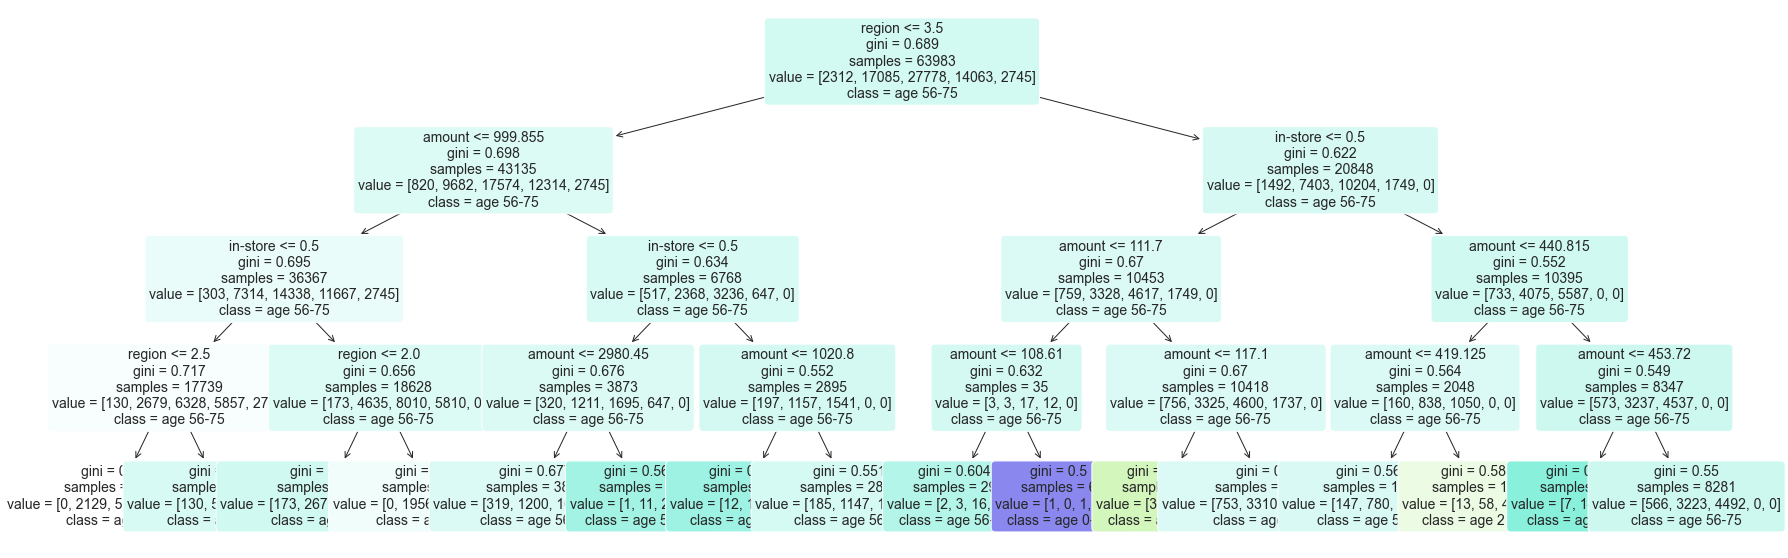

In [43]:
feature_names = X_age.columns
labels = y_age.unique()

age_classifier = DecisionTreeClassifier(max_depth=4)
model = age_classifier.fit(X_train, y_train)

plt.figure(figsize=(30,10))
tree = plot_tree(model,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [44]:
tree_rules = export_text(age_classifier, feature_names = list(feature_names))
print(tree_rules)

|--- region <= 3.50
|   |--- amount <= 999.86
|   |   |--- in-store <= 0.50
|   |   |   |--- region <= 2.50
|   |   |   |   |--- class: age 56-75
|   |   |   |--- region >  2.50
|   |   |   |   |--- class: age 36-55
|   |   |--- in-store >  0.50
|   |   |   |--- region <= 2.00
|   |   |   |   |--- class: age 36-55
|   |   |   |--- region >  2.00
|   |   |   |   |--- class: age 36-55
|   |--- amount >  999.86
|   |   |--- in-store <= 0.50
|   |   |   |--- amount <= 2980.45
|   |   |   |   |--- class: age 36-55
|   |   |   |--- amount >  2980.45
|   |   |   |   |--- class: age 36-55
|   |   |--- in-store >  0.50
|   |   |   |--- amount <= 1020.80
|   |   |   |   |--- class: age 36-55
|   |   |   |--- amount >  1020.80
|   |   |   |   |--- class: age 36-55
|--- region >  3.50
|   |--- in-store <= 0.50
|   |   |--- amount <= 111.70
|   |   |   |--- amount <= 108.61
|   |   |   |   |--- class: age 36-55
|   |   |   |--- amount >  108.61
|   |   |   |   |--- class: age 56-75
|   |   |--- amo

As the accuracy of age prediction based on the given data turned out to be almost 1/3 worse than region prediction, it can be concluded that age plays a very important role in prediction (which is also confirmed by the heatmap shown above).   
After analysing the tree, one notices that region variable was the most prominent. Then, for region 4 (i.e. West) it was relevant where the purchase was made (in-store variable), and for the other regions the amount of money spent.  In addition, with a maximum tree depth of 4, the age range 75+ was not reached even once, so it is likely that the maximum depth would have to be increased to achieve better accuracy. 

### Age prediction by regions

              precision    recall  f1-score   support

    age 0-21       0.04      0.01      0.02        99
   age 21-35       0.32      0.06      0.10       956
   age 36-55       0.47      0.91      0.62      1525
   age 56-75       0.31      0.03      0.06       620

    accuracy                           0.46      3200
   macro avg       0.28      0.25      0.20      3200
weighted avg       0.38      0.46      0.34      3200

|--- amount <= 1969.40
|   |--- amount <= 1969.10
|   |   |--- amount <= 1956.35
|   |   |   |--- amount <= 1942.70
|   |   |   |   |--- amount <= 1942.20
|   |   |   |   |   |--- value: [-0.00]
|   |   |   |   |--- amount >  1942.20
|   |   |   |   |   |--- value: [5.30]
|   |   |   |--- amount >  1942.70
|   |   |   |   |--- amount <= 1950.00
|   |   |   |   |   |--- value: [-0.81]
|   |   |   |   |--- amount >  1950.00
|   |   |   |   |   |--- value: [-0.04]
|   |   |--- amount >  1956.35
|   |   |   |--- amount <= 1957.45
|   |   |   |   |--- items <= 5.5

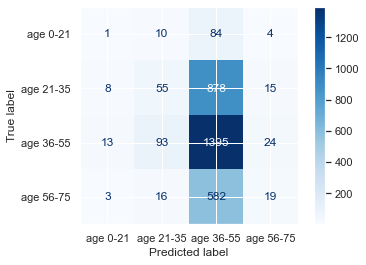

In [45]:
data_north = data.loc[data['region'] == 1] 
X_north_age = data_north.drop(columns=["age_sections", "age"])
y_north_age = data_north["age_sections"]

X_north_age_train, X_north_age_test, y_north_age_train, y_north_age_test = train_test_split(X_north_age, y_north_age, test_size = .20, random_state = 123)

age_north_classifier = GradientBoostingClassifier(max_depth=5)
age_north_classifier.fit(X_north_age_train, y_north_age_train)
y_north_age_pred = age_north_classifier.predict(X_north_age_test)

print(plot_confusion_matrix(age_north_classifier, X_north_age_test, y_north_age_test, cmap=plt.cm.Blues))
print(classification_report(y_north_age_test, y_north_age_pred, zero_division=0))

sub_tree_west = age_north_classifier.estimators_[42, 0]
tree_rules = export_text(sub_tree_west, feature_names = list(feature_names))
print(tree_rules)

**North**  
Accuracy in the northern region is 0.46. This is an average result, but it is worth noting here the very limited 'learning' opportunity provided by only three other parameters in the dataset.  Interestingly, the purchase method variable (online/in-store) was not used once.  
Other interesting finding is that as in the general (not regional) prediction, most predicted labels were the age section 36-55.
This is probably due to the fact that most of the true labels in this region were in age section 36-55, hence the training part of the model developed the most rules just for this group.  

              precision    recall  f1-score   support

   age 21-35       0.10      0.01      0.01       507
   age 36-55       0.35      0.50      0.41      1391
   age 56-75       0.34      0.46      0.39      1398
     age 75+       0.18      0.01      0.03       703

    accuracy                           0.34      3999
   macro avg       0.24      0.25      0.21      3999
weighted avg       0.28      0.34      0.29      3999

|--- amount <= 494.83
|   |--- amount <= 494.77
|   |   |--- amount <= 494.43
|   |   |   |--- amount <= 494.40
|   |   |   |   |--- amount <= 493.97
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- amount >  493.97
|   |   |   |   |   |--- value: [-0.83]
|   |   |   |--- amount >  494.40
|   |   |   |   |--- value: [3.74]
|   |   |--- amount >  494.43
|   |   |   |--- items <= 1.50
|   |   |   |   |--- value: [-0.78]
|   |   |   |--- items >  1.50
|   |   |   |   |--- items <= 6.50
|   |   |   |   |   |--- value: [-0.83]
|   |   |   |   |--- items

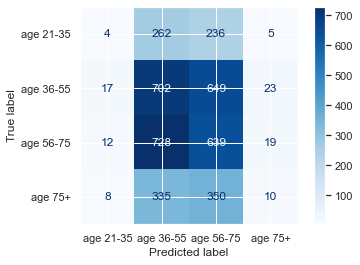

In [46]:
data_south = data.loc[data['region'] == 2] 
X_south_age = data_south.drop(columns=["age_sections", "age"])
y_south_age = data_south["age_sections"]

X_south_age_train, X_south_age_test, y_south_age_train, y_south_age_test = train_test_split(X_south_age, y_south_age, test_size = .20, random_state = 123)

age_south_classifier = GradientBoostingClassifier(max_depth=5)
age_south_classifier.fit(X_south_age_train, y_south_age_train)
y_south_age_pred = age_south_classifier.predict(X_south_age_test)

print(plot_confusion_matrix(age_south_classifier, X_south_age_test, y_south_age_test, cmap=plt.cm.Blues))
print(classification_report(y_south_age_test, y_south_age_pred, zero_division=0))

sub_tree_west = age_south_classifier.estimators_[45, 0]
tree_rules = export_text(sub_tree_west, feature_names = list(feature_names))
print(tree_rules)

**South**  
First of all, this is the only region where the 75+ group is included.
The accuracy in this region is slightly lower than in the others, what  is likely to be due to the additional label (age section 75+).  
As noted earlier in the analysis of age by region, the South is demographically the oldest region. Hence it is not surprising that here the labels provided are split between age sections 36-55 and 56-75.  
The main prediction feature was the amount spent per transaction, but also the number of items was used.

              precision    recall  f1-score   support

    age 0-21       0.00      0.00      0.00       107
   age 21-35       0.32      0.05      0.08       953
   age 36-55       0.42      0.85      0.56      1520
   age 56-75       0.32      0.13      0.18      1020

    accuracy                           0.41      3600
   macro avg       0.27      0.26      0.21      3600
weighted avg       0.36      0.41      0.31      3600

|--- in-store <= 0.50
|   |--- amount <= 100.80
|   |   |--- items <= 5.50
|   |   |   |--- value: [1.05]
|   |   |--- items >  5.50
|   |   |   |--- value: [-0.76]
|   |--- amount >  100.80
|   |   |--- amount <= 162.72
|   |   |   |--- items <= 7.50
|   |   |   |   |--- items <= 3.50
|   |   |   |   |   |--- value: [0.02]
|   |   |   |   |--- items >  3.50
|   |   |   |   |   |--- value: [-0.60]
|   |   |   |--- items >  7.50
|   |   |   |   |--- amount <= 119.35
|   |   |   |   |   |--- value: [1.65]
|   |   |   |   |--- amount >  119.35
|   |   |   |   | 

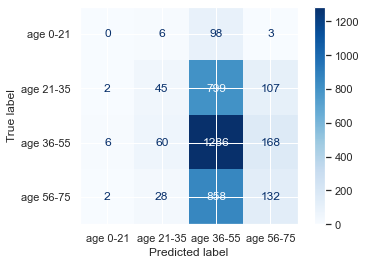

In [47]:
data_east = data.loc[data['region'] == 3] 
X_east_age = data_east.drop(columns=["age_sections", "age"])
y_east_age = data_east["age_sections"]

X_east_age_train, X_east_age_test, y_east_age_train, y_east_age_test = train_test_split(X_east_age, y_east_age, test_size = .20, random_state = 123)

age_east_classifier = GradientBoostingClassifier(max_depth=5)
age_east_classifier.fit(X_east_age_train, y_east_age_train)
y_east_age_pred = age_east_classifier.predict(X_east_age_test)

print(plot_confusion_matrix(age_east_classifier, X_east_age_test, y_east_age_test, cmap=plt.cm.Blues))
print(classification_report(y_east_age_test, y_east_age_pred, zero_division=0))

sub_tree_west = age_east_classifier.estimators_[42, 0]
tree_rules = export_text(sub_tree_west, feature_names = list(feature_names))
print(tree_rules)

**East**  
The accuracy in Eastern region is around 0.41. Again, most predicted labels were the age section 36-55. What's worrying, none of the instances in age section 0-21 was classified correctly.  
In contrast to other regions, here the first variable used for classification was that of the mode of shopping (in-store/online). Only then was the amount of money spent and the number of items bought used. Moreover, but in-store shopping, the number of things bought was the more important determinant.

              precision    recall  f1-score   support

    age 0-21       0.07      0.00      0.01       377
   age 21-35       0.35      0.06      0.10      1782
   age 36-55       0.50      0.94      0.65      2605
   age 56-75       0.29      0.01      0.03       434

    accuracy                           0.49      5198
   macro avg       0.30      0.25      0.20      5198
weighted avg       0.40      0.49      0.36      5198

|--- amount <= 764.58
|   |--- amount <= 740.11
|   |   |--- amount <= 740.07
|   |   |   |--- amount <= 735.42
|   |   |   |   |--- amount <= 732.91
|   |   |   |   |   |--- value: [-0.01]
|   |   |   |   |--- amount >  732.91
|   |   |   |   |   |--- value: [-0.80]
|   |   |   |--- amount >  735.42
|   |   |   |   |--- items <= 5.50
|   |   |   |   |   |--- value: [-0.38]
|   |   |   |   |--- items >  5.50
|   |   |   |   |   |--- value: [1.66]
|   |   |--- amount >  740.07
|   |   |   |--- value: [4.12]
|   |--- amount >  740.11
|   |   |--- items <= 5.50


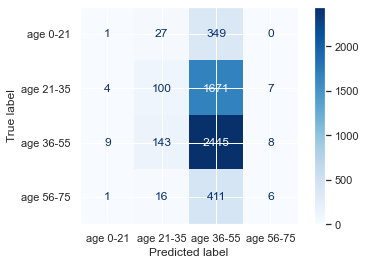

In [48]:
data_west = data.loc[data['region'] == 4] 
X_west_age = data_west.drop(columns=["age_sections", "age"])
y_west_age = data_west["age_sections"]

X_west_age_train, X_west_age_test, y_west_age_train, y_west_age_test = train_test_split(X_west_age, y_west_age, test_size = .20, random_state = 123)

age_west_classifier = GradientBoostingClassifier(max_depth=5)
age_west_classifier.fit(X_west_age_train, y_west_age_train)
y_west_age_pred = age_west_classifier.predict(X_west_age_test)

print(plot_confusion_matrix(age_west_classifier, X_west_age_test, y_west_age_test, cmap=plt.cm.Blues))
print(classification_report(y_west_age_test, y_west_age_pred, zero_division=0))

sub_tree_west = age_west_classifier.estimators_[42, 0]
tree_rules = export_text(sub_tree_west, feature_names = list(feature_names))
print(tree_rules)

**West**  
In the Western region, similary to the Eastern and Northen regions, the the vast majority of instances were assigned to the 36-55 age group. Again, this is probably due to the fact that most of the true labels in this region were in this age section, hence the training part of the model developed the most rules just for this group.  
As for the impact of the variable on the number of items bought, this is used at later moments (depths) of the analysis, especially the distinction between 5 items and more/less or 6 items and more/less. 

**All regions**  
All in all, when analysing the prediction of age ranges based on other demographic data, it can be seen that the number of money spent per transaction has the greatest impact and additionally, in many cases, the number of items bought has been helpful.  
Surprisingly, the in-store variable was used only once, for Eastern region.

The western region had the highest accuracy, with the model achieving almost 0.5 accuracy.

## Type of transaction (in-store/online) as a target variable
Is there any correlation between age of a customer and if the transaction was made online or in the store? Do any other factors predict if a customer will buy online or in our stores?

### Transaction type variable analysis

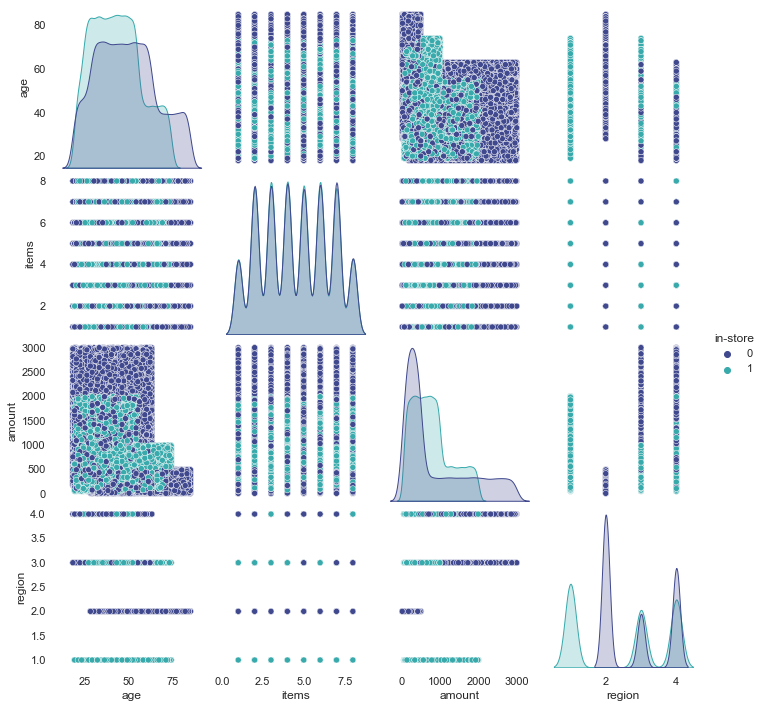

In [49]:
sns.pairplot(data, hue ='in-store', palette = 'mako')

This pairplot shows the relationship between the variables by type of transaction. As noted in the previous part of the analysis (Task 1), the most interesting fact here is that in South customers bought products ONLY online, and in North - ONLY in-store.  
It is also worth focusing on clearly distinguished where the purchase was made in relation to age and the amount of money spent.

### Transaction type prediction

#### Confusion matrices for different classifiers

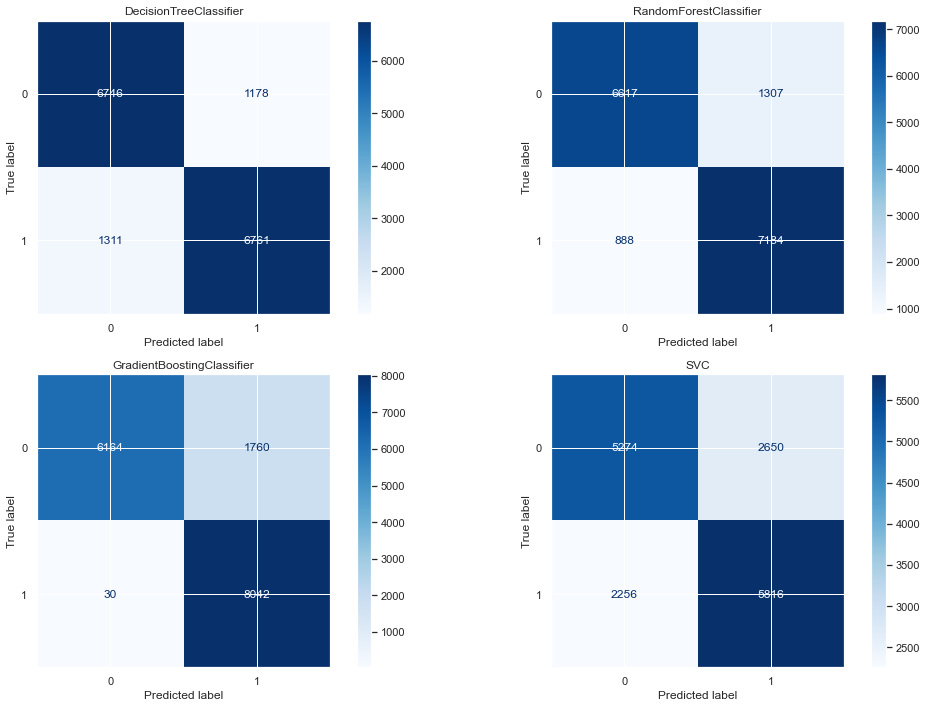

In [52]:
X_type = data.drop(columns=["age_sections", "in-store"])
y_type = data['in-store']
X_train, X_test, y_train, y_test = train_test_split(X_type, y_type, test_size = .20, random_state = 123)
classifiers = [DecisionTreeClassifier(), 
               RandomForestClassifier(),
               GradientBoostingClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    print(plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues'))
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

#### Classification report (different classifiers)

In [53]:
for cls in (classifiers):
    y_pred_type = cls.predict(X_test)
    print("Classifier: ", cls)
    print(classification_report(y_test, y_pred_type, zero_division=0))

Classifier:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      7924
           1       0.85      0.84      0.84      8072

    accuracy                           0.84     15996
   macro avg       0.84      0.84      0.84     15996
weighted avg       0.84      0.84      0.84     15996

Classifier:  RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7924
           1       0.85      0.89      0.87      8072

    accuracy                           0.86     15996
   macro avg       0.86      0.86      0.86     15996
weighted avg       0.86      0.86      0.86     15996

Classifier:  GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       1.00      0.78      0.87      7924
           1       0.82      1.00      0.90      8072

    accuracy                           0.89     15996
   macro a

#### Exemplary classification tree visualization

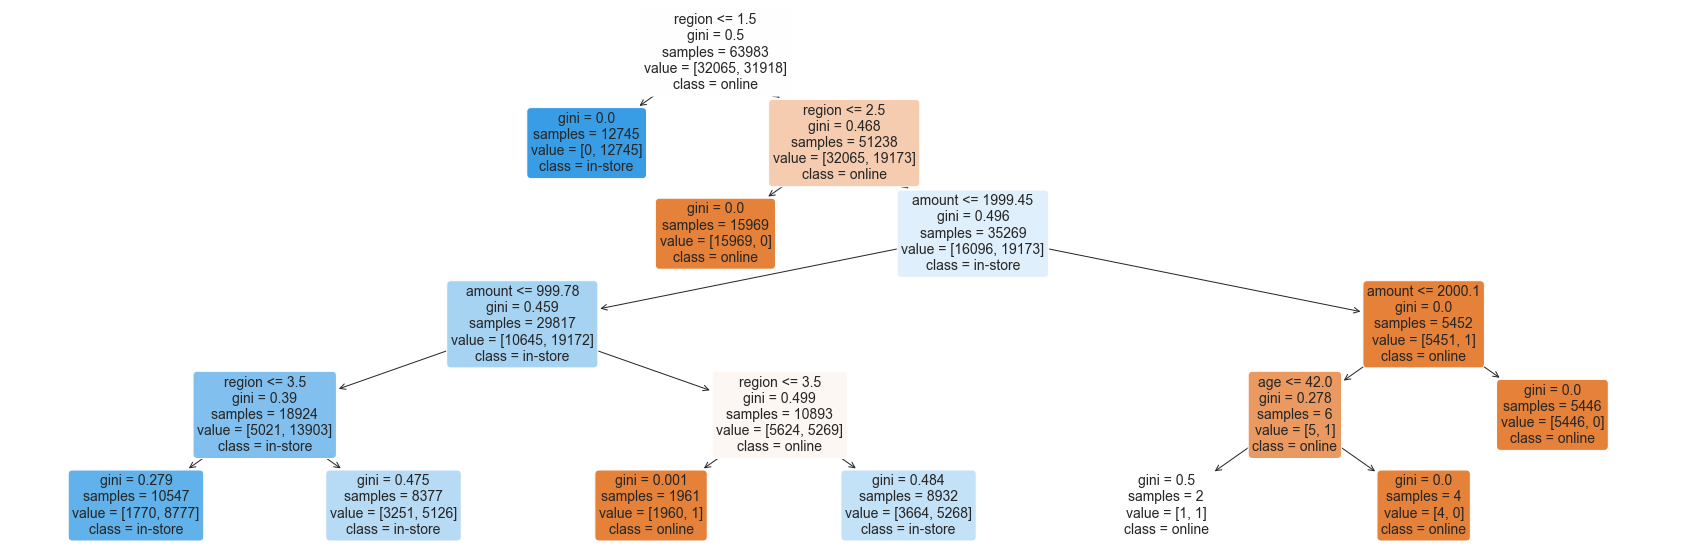

In [54]:
feature_names = X_type.columns
labels = ["online", "in-store"]
type_classifier = DecisionTreeClassifier(max_depth=5)
model = type_classifier.fit(X_train, y_train)

plt.figure(figsize=(30,10))
tree = plot_tree(model,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)
plt.show()

In [55]:
tree_rules = export_text(model, feature_names = list(feature_names))
print(tree_rules)

|--- region <= 1.50
|   |--- class: 1
|--- region >  1.50
|   |--- region <= 2.50
|   |   |--- class: 0
|   |--- region >  2.50
|   |   |--- amount <= 1999.45
|   |   |   |--- amount <= 999.78
|   |   |   |   |--- region <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- region >  3.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- amount >  999.78
|   |   |   |   |--- region <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- region >  3.50
|   |   |   |   |   |--- class: 1
|   |   |--- amount >  1999.45
|   |   |   |--- amount <= 2000.10
|   |   |   |   |--- age <= 42.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  42.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- amount >  2000.10
|   |   |   |   |--- class: 0



Accuracy of the type prediction is by far the highest, at up to 0.89 (for Gradient Boosting Classifier). Undoubtedly, this result is influenced by the fact that in two out of four regions the algorithm can assign a transaction mode without complex analysis.  
It can be seen that the variable of the amount of money spent plays a significant role, as every transaction above \\$999.45 was done online and also every transaction below \\$999.79 was done on-site at a stationary shop.

### Type prediction by regions

              precision    recall  f1-score   support

           0       1.00      0.73      0.84      1375
           1       0.85      1.00      0.92      2225

    accuracy                           0.90      3600
   macro avg       0.93      0.86      0.88      3600
weighted avg       0.91      0.90      0.89      3600



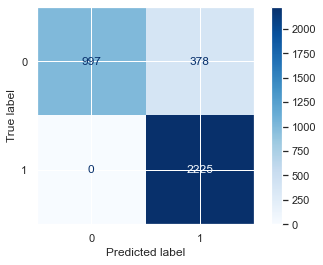

In [56]:
X_east_type = data_east.drop(columns=["age_sections", "in-store"])
y_east_type = data_east["in-store"]

X_east_type_train, X_east_type_test, y_east_type_train, y_east_type_test = train_test_split(X_east_type, y_east_type, test_size = .20, random_state = 123)

type_east_classifier = DecisionTreeClassifier(max_depth=4)
type_east_classifier.fit(X_east_type_train, y_east_type_train)
y_east_type_pred = type_east_classifier.predict(X_east_type_test)

print(plot_confusion_matrix(type_east_classifier, X_east_type_test, y_east_type_test, cmap=plt.cm.Blues))
print(classification_report(y_east_type_test, y_east_type_pred, zero_division=0))

In [57]:
tree_rules = export_text(type_east_classifier, feature_names = list(feature_names))
print(tree_rules)

|--- amount <= 1000.30
|   |--- age <= 23.50
|   |   |--- class: 0
|   |--- age >  23.50
|   |   |--- age <= 63.50
|   |   |   |--- amount <= 100.93
|   |   |   |   |--- class: 1
|   |   |   |--- amount >  100.93
|   |   |   |   |--- class: 1
|   |   |--- age >  63.50
|   |   |   |--- class: 1
|--- amount >  1000.30
|   |--- class: 0



Note that in the eastern region the accuracy in predicting transaction type is as high as 90%. In addition, transactions made in stationary shops were classified 100% correctly, only the problem appeared with misclassified online transactions. A significant influence on such a result is the fact that in this region all transactions above \\$1000.3 were done online and transactions below this amount done by people between the age 24 and 63 were done in stationary shops.

              precision    recall  f1-score   support

           0       1.00      0.46      0.63      2552
           1       0.66      1.00      0.79      2646

    accuracy                           0.73      5198
   macro avg       0.83      0.73      0.71      5198
weighted avg       0.82      0.73      0.71      5198



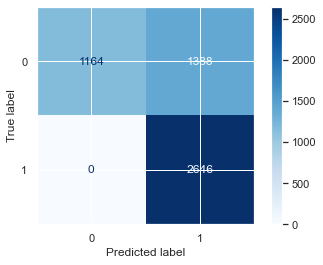

In [58]:
X_west_type = data_west.drop(columns=["age_sections", "in-store"])
y_west_type = data_west["in-store"]

X_west_type_train, X_west_type_test, y_west_type_train, y_west_type_test = train_test_split(X_west_type, y_west_type, test_size = .20, random_state = 123)

type_west_classifier = DecisionTreeClassifier(max_depth=3)
type_west_classifier.fit(X_west_type_train, y_west_type_train)
y_west_type_pred = type_west_classifier.predict(X_west_type_test)

print(plot_confusion_matrix(type_west_classifier, X_west_type_test, y_west_type_test, cmap=plt.cm.Blues))
print(classification_report(y_west_type_test, y_west_type_pred, zero_division=0))

In [61]:
tree_rules = export_text(type_west_classifier, feature_names = list(feature_names))
print(tree_rules)

|--- amount <= 1999.45
|   |--- age <= 55.50
|   |   |--- age <= 18.50
|   |   |   |--- class: 0
|   |   |--- age >  18.50
|   |   |   |--- class: 1
|   |--- age >  55.50
|   |   |--- class: 0
|--- amount >  1999.45
|   |--- amount <= 2000.10
|   |   |--- age <= 35.00
|   |   |   |--- class: 1
|   |   |--- age >  35.00
|   |   |   |--- class: 0
|   |--- amount >  2000.10
|   |   |--- class: 0



In the western region, accuracy is already much lower - only 0.73. This is due to the higher number of misclassified transactions made online, which the model assigned a predicted label as 'in-store' (value 1). It may be caused by the fact that some more expensive transactions were also made in-store.

## Conclusions

- Applying four different classifiers: Decision Tree classifier, Random forest classifier, Gradient boosting classifier and Support Vector Machine (SVM) practically in all predictions Gradient boosting classifier turned out to be the best. The second in terms of accuracy was the Decision Tree classifier.
- Once the analysis is done, it can be seen that, just as the heatmap showed at the beginning, the amount of money spent had the greatest impact on predicting region, and in predicting age certainly region and amount of money spent were the key features.  
- **It is noteworthy that customers over 75 are only found in the South, for this is also the only region with no people aged 6-21. The East and North regions have the most similar age distribution.**
- As the accuracy of age prediction based on the given data turned out to be almost 1/3 worse than region prediction, it can be concluded that age plays a very important role in predictions for that dataset.
- **Accuracy for predicting age in different regions varies between 0.34 and 0.49, which is not very impressive. This may be due to the fact that two key features (predicted age and region) are not available as parameters that the model could have used for classification.**
- In all regions, the amount of money spent on a transaction plays a very important role in predicting age. **Interestingly, even though the correlation matrix shows a much higher correlation coefficient between age and in-store (0.18) than between age and the number of items purchased (0.00066), the number of items purchased was more often used to create age prediction models in individual regions.**
- The feature number of items bought was used to classify age in particular regions, despite a very low correlation coefficient.
- Surprisingly, the in-store variable was used only once, for Eastern region while predicting the age in region.
- **The factors that correlate the most with the transaction type are age (0.18) and region (0.13).**
- **Accuracy of the type prediction is the most succesfull of different variables predictions, at up to 0.89 (for Gradient Boosting Classifier).** Undoubtedly, this result is influenced by the fact that in two out of four regions the algorithm can assign a transaction mode without complex analysis.
- **It can be seen that the variable of the amount of money spent plays a significant role in type prediction, as every transaction above \\$999.45 was done online and also every transaction below \\$999.79 was done on-site at a stationary shop.**